# parenting

요즘 한국에선 육아용품 직구가 유행이라고 한다. 실제로 그럴까?

(가설) 만약 그렇다면, 신생아가 많이 태어날 수록 그 분기의 육아용품 직구금액이 높을 것이다.

한국통계청에서 제공하는 [국가통계포털](http://kosis.kr/)에서 다음 정보를 찾을 수 있다.
* [분기별 신생아 수](http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B8000G&conn_path=I3)
* [분기별 육아용품 직구 비용](http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE1009&conn_path=I3)

통계포털의 자료는 엑셀 파일(xlsx)로 제공되는데, pandas는 고맙게도 read_excel() 함수를 통해 엑셀 파일 읽기를 지원한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

birth = pd.read_excel('data/birth.xlsx')
imp = pd.read_excel('data/import.xlsx') # 단위: 백만원

In [2]:
birth

,행정구역별,종류별,2013 4/4,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4 p),2016 2/4 p),2016 3/4 p)
0,전국,출생,101854,116004,107103,110808,101520,117952,110126,108263,102079,112600,102600,102200


위의 데이터를 보면 행정구역별, 종류별이란 열은 필요없는 데이터이고, 마지막 열을 보면 "p)"라고 불필요한 데이터가 붙어있다. 이 정보들을 삭제한다.

In [3]:
birth = birth.drop(birth.columns[:2], axis=1)
birth

,2013 4/4,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4 p),2016 2/4 p),2016 3/4 p)
0,101854,116004,107103,110808,101520,117952,110126,108263,102079,112600,102600,102200


In [4]:
birth.columns = [ col[:8] for col in birth.columns ]
birth2 = birth
birth2

,2013 4/4,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4
0,101854,116004,107103,110808,101520,117952,110126,108263,102079,112600,102600,102200


신생아 수에 대한 처리가 끝났으니, 수입금액를 살펴보면,

In [5]:
imp

,국가(대륙)별,상품군별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4 p)
0,합계,아동·유아용품,13235,11860,12337,16602,16092,15269,13577,16877,16883,14255,15185,17143
1,미국,아동·유아용품,11015,9378,9580,11891,11425,10135,8762,10723,10567,7103,7098,7426
2,중국,아동·유아용품,359,649,898,971,950,1408,1620,1968,2220,2834,3879,4556
3,일본,아동·유아용품,1560,1543,1474,3365,3119,2888,2554,3419,3460,3283,3495,4282
4,아세안(ASEAN),아동·유아용품,2,11,8,8,26,50,16,25,19,20,22,39
5,EU,아동·유아용품,281,266,365,355,529,763,602,708,591,995,656,803
6,중동,아동·유아용품,0,0,0,-,1,0,3,3,1,0,1,0
7,중남미,아동·유아용품,-,0,0,-,0,0,-,0,2,2,1,3
8,대양주,아동·유아용품,6,7,7,5,17,10,14,20,16,14,12,16
9,기타,아동·유아용품,12,6,8,6,26,15,4,9,7,4,19,18


어느 지역에 물건을 많이 샀는지는 현재 관심사가 아니다. 잘라버리자. 그리고 마찬가지로 불필요한 열을 지우고 p) 문자도 지우면,

In [6]:
imp = imp.drop(imp.columns[:2], axis=1)
imp.columns = [ s[:8] for s in imp.columns ]
imp2 = imp.loc[0]
imp2

2014 1/4    13235
2014 2/4    11860
2014 3/4    12337
2014 4/4    16602
2015 1/4    16092
2015 2/4    15269
2015 3/4    13577
2015 4/4    16877
2016 1/4    16883
2016 2/4    14255
2016 3/4    15185
2016 4/4    17143
Name: 0, dtype: object

Serial 객체가 나온다. 이를 다시 DataFrame으로 변경하면, (인자로 열 이름을 넘길 수 있다)

In [7]:
imp2 = imp2.to_frame('imported_value')
imp2

,imported_value
2014 1/4,13235
2014 2/4,11860
2014 3/4,12337
2014 4/4,16602
2015 1/4,16092
2015 2/4,15269
2015 3/4,13577
2015 4/4,16877
2016 1/4,16883
2016 2/4,14255


분기가 같은 두 개의 데이터가 있다. 분기를 기준으로 합치면 다음과 같다. birth2의 경우, 방향을 뒤집고 열 이름도 지정해야 한다.

In [8]:
merge = pd.merge(birth2.T.rename(columns={0:'birth'}), imp2, left_index=True, right_index=True, how='outer')
merge

,birth,imported_value
2013 4/4,101854.0,NaN
2014 1/4,116004.0,13235
2014 2/4,107103.0,11860
2014 3/4,110808.0,12337
2014 4/4,101520.0,16602
2015 1/4,117952.0,16092
2015 2/4,110126.0,15269
2015 3/4,108263.0,13577
2015 4/4,102079.0,16877
2016 1/4,112600.0,16883


2013년 4분기의 경우, 직구 금액에 대한 정보가 없고, 2016년 4분기의 경우 신생아 수에 대한 정보가 없다.

2013년의 자료는 삭제하고, 2016년 4분기의 신생아 수는 3분기 신생아 수와 같다고 가정해본다.

In [9]:
merge = merge.fillna(method='ffill')
merge # 2016년도 4분기 자료 생성

,birth,imported_value
2013 4/4,101854.0,NaN
2014 1/4,116004.0,13235.0
2014 2/4,107103.0,11860.0
2014 3/4,110808.0,12337.0
2014 4/4,101520.0,16602.0
2015 1/4,117952.0,16092.0
2015 2/4,110126.0,15269.0
2015 3/4,108263.0,13577.0
2015 4/4,102079.0,16877.0
2016 1/4,112600.0,16883.0


In [10]:
merge = merge.dropna()
merge # 자료가 없는 데이터 삭제

,birth,imported_value
2014 1/4,116004.0,13235.0
2014 2/4,107103.0,11860.0
2014 3/4,110808.0,12337.0
2014 4/4,101520.0,16602.0
2015 1/4,117952.0,16092.0
2015 2/4,110126.0,15269.0
2015 3/4,108263.0,13577.0
2015 4/4,102079.0,16877.0
2016 1/4,112600.0,16883.0
2016 2/4,102600.0,14255.0


그림을 그려보면,

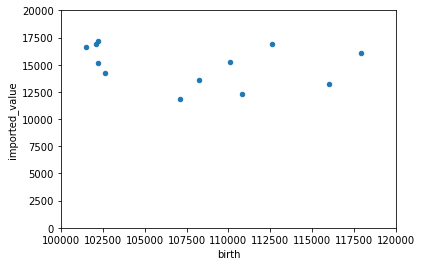

In [12]:
merge.plot.scatter('birth', 'imported_value', xlim=[100000, 120000], ylim=[0,20000])

## 의의

현재 있는 자료를 보면 처음에 세운 가설이 맞지 않는 것 같다. T_T

pandas를 이용하면 엑셀 파일도 읽을 수 있다.